In [1]:
__author__ = "@Tssp"
__date__   = "04/02/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix2774_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q2dq3d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_152rm8g2l34m24_102CM8g1L34M24_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix2774iy4993iz4993_ix2774iy50iz50/Ag_B1u_vsLiLi3d2d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70250', '.70255', '.70260', '.70265', '.70270', '.70275', '.70280', '.70285', '.70290', '.70295', '.70300', '.70305', '.70310', '.70315', '.70316', '.70320', '.70325', '.70330', '.70335', '.70340', '.70345', '.70350', '.70355', '.70360', '.70365', '.70370', '.70375', '.70380', '.70385', '.70390', '.70395', '.70400', '.70405', '.70410', '.70415', '.70420', '.70425', '.70430', '.70435', '.70440', '.70445', '.70450', '.70455', '.70460', '.70465', '.70470', '.70475', '.70480', '.70485', '.70490', '.70495', '.70500', '.70505', '.70510', '.70515', '.70520', '.70525', '.70530', '.70535', '.70540', '.70545', '.70550', '.70555', '.70556', '.70557', '.70558', '.70559', '.70560', '.70561', '.70562', '.70563', '.70564', '.70565', '.70

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
least_bound_pos = 2050

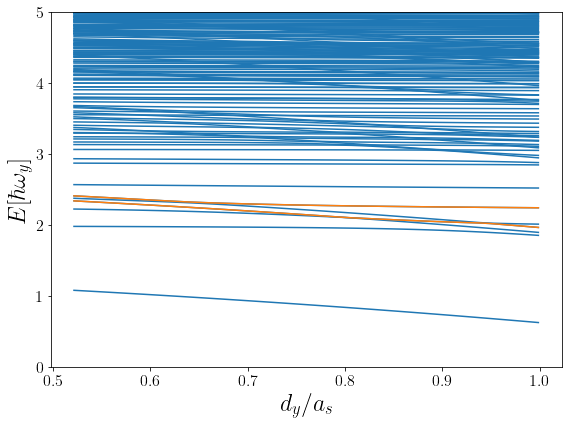

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 120):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.plot(x, dic['nivel_2055']/wy, 'C1')
ax.set_ylim(0, 5)
#ax.set_xlim(-4, 4)
#ax.vlines(x[130], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[115], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[90], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[70], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[50], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[33], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#plt.xlim(0.5, 0.7)
#plt.ylim(2.5, 2.72)
#fig.savefig('Results/Figures/Ix2497_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

## Resonance x<1

In [15]:
%matplotlib inline

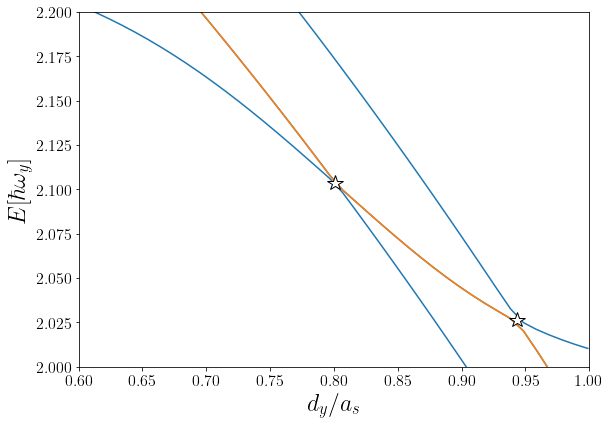

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.set_ylim(0, 5)
#ax.set_xlim(-4, 4)
ax.plot(0.80106, 2.10350, 'w*', markersize=16, markeredgecolor='k')
ax.plot(0.94303, 2.02632, 'w*', markersize=16, markeredgecolor='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
plt.xlim(0.6, 1)
plt.ylim(2, 2.2)
#fig.savefig('Results/Figures/Ix7802_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

In [17]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): {0.80106, 2.10350}
* trap-(0,2,0): {0.94303, 2.02632}''')

Crosses between (x, E):
* trap-(2,0,0): (0.80106, 2.1035)
* trap-(0,2,0): (0.94303, 2.02632)


In [18]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): {1/0.80106}
* trap-(0,2,0): {1/0.94303}''')

Crosses between (x, E):
* trap-(2,0,0): 1.2483459416273437
* trap-(0,2,0): 1.06041165180323


## Resonance x>1

2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


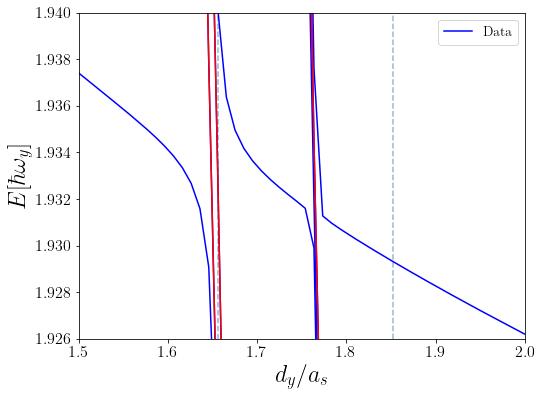

In [28]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+2, least_bound_pos + 21):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_2056'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2055'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2059'.format(i)]/wy, 'r')
ax2.vlines(x[130], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[115], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[90], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[70], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[50], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[33], 0, 10, alpha=0.5, linestyles='--')
ax2.set_ylim(1.926, 1.94)
ax2.set_xlim(1.5, 2)
ax2.set_xlabel('$d_{y}/a_s$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [21]:
print('''f Eigenstates:
2054: trap
2055: (4,0,0) ICIR
2056: (0,4,0) ICIR
2057: (0,0,4)
2058: (2,0,2)
2059: (2,2,0)
2060: (0,2,2)
''')

f Eigenstates:
2054: trap
2055: (4,0,0) ICIR
2056: (0,4,0) ICIR
2057: (0,0,4)
2058: (2,0,2)
2059: (2,2,0)
2060: (0,2,2)



In [50]:
print(f'''To find the eigenstates:
x={x[185]}, delta=0{delta[185]}
x={x[165]}, delta=0{delta[165]}
x={x[130]}, delta=0{delta[130]}
x={x[115]}, delta=0{delta[115]}
x={x[90]}, delta=0{delta[90]}
x={x[70]}, delta=0{delta[70]}
x={x[50]}, delta=0{delta[50]}
x={x[33]}, delta=0{delta[33]}
''')

To find the eigenstates:
x=0.6950184766427349, delta=0.71180
x=0.8979050545010485, delta=0.71080
x=1.2494570329044332, delta=0.70905
x=1.3987817157243425, delta=0.70830
x=1.655740694128729, delta=0.70700
x=1.8518107118323281, delta=0.70600
x=2.0465192587369625, delta=0.70500
x=2.2109655380775526, delta=0.70415



In [19]:
%matplotlib inline

# (2,0,0) (0,2,0)

5.431274645074939e-13
[0.0, -8.28543180272093 + 0.e-22*I, 1.65464350546243 - 0.e-22*I, 12.4533640150353 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -8.28543180272093 + 0.e-22*I, 1.65464350546243 - 0.e-22*I, 12.4533640150353 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -8.50466118440274 - 0.e-22*I, 1.76610402232263 + 0.e-22*I, 12.5611328798569 - 0.e-21*I]
Write the position of the correct solution: 2
[0.0, -8.50466118440274 - 0.e-22*I, 1.76610402232263 + 0.e-22*I, 12.5611328798569 - 0.e-21*I]
Write the position of the correct solution: 2


(1.5, 2.0)

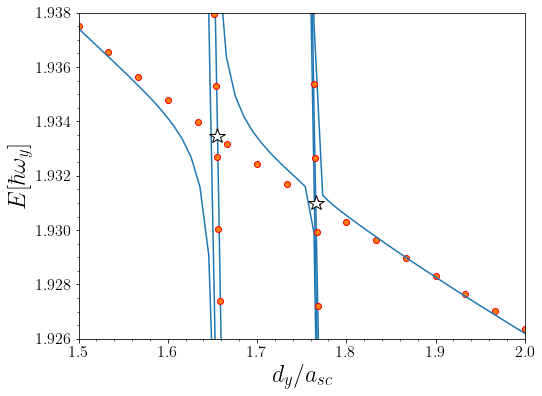

In [45]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 2054:
trap_poly = trap_fit(dic, x, x_lims=(1.5, 2), y_lims=(1.9, 2) ,levels=(2052, 2066), tol=0.04, wy=wy)/wy
x2054 = np.linspace(1.2, 2.5, num=40)
ax3.scatter(x2054, np.polyval(trap_poly, x2054), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)
ax3.plot(x, dic['nivel_2054']/wy, 'C0', label='Adiabatic', zorder=2)

# nivel 2055:
ax3.plot(x, dic['nivel_2055']/wy, 'C0', zorder=1)

# nivel 2056:
ax3.plot(x, dic['nivel_2056']/wy, 'C0', zorder=1)
f2056 = np.polyfit(x[(x < 1.7) & (x > 1.6)], np.array(dic['nivel_2056'])[(x < 1.7) & (x > 1.6)]/wy, deg=1)
x2056 = np.linspace(1.6, 1.7, num=70)
ax3.scatter(x2056, np.polyval(f2056, x2056), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2057:
ax3.plot(x, dic['nivel_2057']/wy, 'C0', zorder=1)

# nivel 2058:
ax3.plot(x, dic['nivel_2058']/wy, 'C0', zorder=1)

# nivel 2059:
ax3.plot(x, dic['nivel_2059']/wy, 'C0', zorder=1)

# nivel 2060:
ax3.plot(x, dic['nivel_2060']/wy, 'C0', zorder=1)
f2059 = np.polyfit(x[(x < 1.78) & (x > 1.75)], np.array(dic['nivel_2059'])[(x < 1.78) & (x > 1.75)]/wy, deg=1)
x2059 = np.linspace(1.7, 1.8, num=70)
ax3.scatter(x2059, np.polyval(f2059, x2059), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2056), np.polyval(trap_poly, cross_points(trap_poly, f2056)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2059), np.polyval(trap_poly, cross_points(trap_poly, f2059)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.22, 2.635), xytext=(1.20, 2.637), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.17, 2.6305), xytext=(1.20, 2.6305), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.31, 2.6357), xytext=(1.33, 2.6357), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(1.926, 1.938)
ax3.set_xlim(1.5, 2)
#fig3.savefig('Results/Figures/LiLi_2d3d_7802_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [47]:
print(f'''Crosses between (x, E):
* trap-(0,4,0)-(0,0,4)-(4,0,0): ({cross_points(trap_poly, f2056)}, {np.polyval(trap_poly, cross_points(trap_poly, f2056))})
* trap-(2,2,0)-(2,0,2)-(0,2,2): ({cross_points(trap_poly, f2059)}, {np.polyval(trap_poly, cross_points(trap_poly, f2059))})
''')

[0.0, -8.28543180272093 + 0.e-22*I, 1.65464350546243 - 0.e-22*I, 12.4533640150353 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -8.28543180272093 + 0.e-22*I, 1.65464350546243 - 0.e-22*I, 12.4533640150353 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -8.50466118440274 - 0.e-22*I, 1.76610402232263 + 0.e-22*I, 12.5611328798569 - 0.e-21*I]
Write the position of the correct solution: 2
[0.0, -8.50466118440274 - 0.e-22*I, 1.76610402232263 + 0.e-22*I, 12.5611328798569 - 0.e-21*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(0,4,0)-(0,0,4)-(4,0,0): (1.65464350546243, 1.93345746508643)
* trap-(2,2,0)-(2,0,2)-(0,2,2): (1.76610402232263, 1.93099400252644)



In [48]:
print(f'''Crosses between (x, E):
* trap-(0,4,0)-(0,0,4)-(4,0,0): ({1/cross_points(trap_poly, f2056)})
* trap-(2,2,0)-(2,0,2)-(0,2,2): ({1/cross_points(trap_poly, f2059)})
''')

[0.0, -8.28543180272093 + 0.e-22*I, 1.65464350546243 - 0.e-22*I, 12.4533640150353 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -8.50466118440274 - 0.e-22*I, 1.76610402232263 + 0.e-22*I, 12.5611328798569 - 0.e-21*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(0,4,0)-(0,0,4)-(4,0,0): (0.604359789101839)
* trap-(2,2,0)-(2,0,2)-(0,2,2): (0.566218063806279)

